<a href="https://colab.research.google.com/github/2303A52378/SML/blob/main/smlass3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv("/content/archive.zip", usecols=['latitude', 'total_rooms', 'housing_median_age', 'total_bedrooms'])

# Function to calculate the MLE (mean and standard deviation) for a column
def calculate_mle(column_data):
    mean = np.mean(column_data)
    std = np.std(column_data)
    return mean, std

# Dictionary to store results
results = {}

# Calculate MLE for each specified column
for column in data.columns:
    mean, std = calculate_mle(data[column])
    results[column] = {
        'mean': mean,
        'std': std
    }

# Display the results
for column, params in results.items():
    print("Column:", column)
    print("Mean:", round(params['mean'], 2))
    print("Standard Deviation:", round(params['std'], 2))
    print("-" * 30)

Column: latitude
Mean: 35.63
Standard Deviation: 2.14
------------------------------
Column: housing_median_age
Mean: 28.64
Standard Deviation: 12.59
------------------------------
Column: total_rooms
Mean: 2635.76
Standard Deviation: 2181.56
------------------------------
Column: total_bedrooms
Mean: 537.87
Standard Deviation: 421.37
------------------------------


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Load the dataset
data = pd.read_csv("/content/archive.zip", usecols=['latitude'])

# Display the first 20 rows
print(data.head(20))

# Extract latitude values as a numpy array
latitude = data['latitude'].values

# Log-likelihood function using scipy.stats
def log_likelihood(data, mean, std):
    return np.sum(norm.logpdf(data, mean, std))

# Standard deviation from the data
std_latitude = np.std(latitude)

# Calculate log-likelihoods for assumed means
mean_values = [50, 75, 80]
log_likelihoods = {mean: log_likelihood(latitude, mean, std_latitude) for mean in mean_values}

# Find maximum likelihood estimate (MLE) for the mean
mle_mean = np.mean(latitude)
max_log_likelihood = log_likelihood(latitude, mle_mean, std_latitude)

# Display the results
print("Log-likelihood values for assumed means:")
for mean, ll in log_likelihoods.items():
    print("Mean:", mean, "Log-likelihood:", round(ll, 2))

print("\nMaximum likelihood estimate for mean:", round(mle_mean, 2))
print("Max log-likelihood:", round(max_log_likelihood, 2))

    latitude
0      37.88
1      37.86
2      37.85
3      37.85
4      37.85
5      37.85
6      37.84
7      37.84
8      37.84
9      37.84
10     37.85
11     37.85
12     37.85
13     37.84
14     37.85
15     37.85
16     37.85
17     37.85
18     37.84
19     37.84
Log-likelihood values for assumed means:
Mean: 50 Log-likelihood: -511952.21
Mean: 75 Log-likelihood: -3550913.61
Mean: 80 Log-likelihood: -4498025.42

Maximum likelihood estimate for mean: 35.63
Max log-likelihood: -44950.35


/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


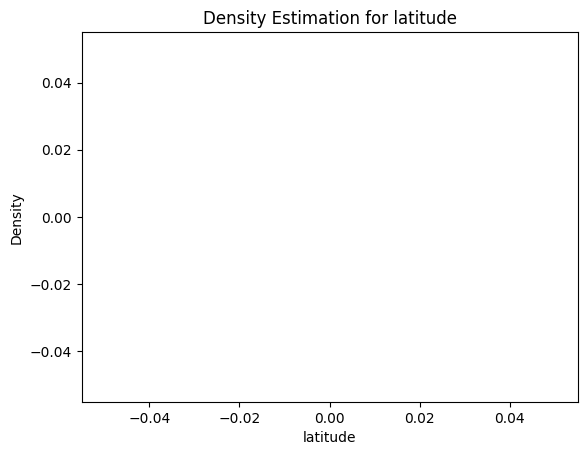

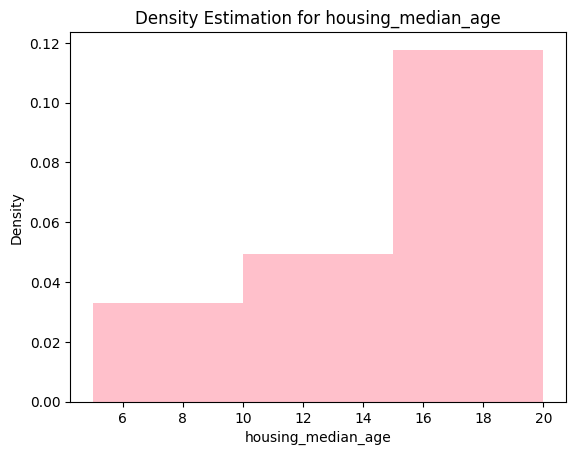

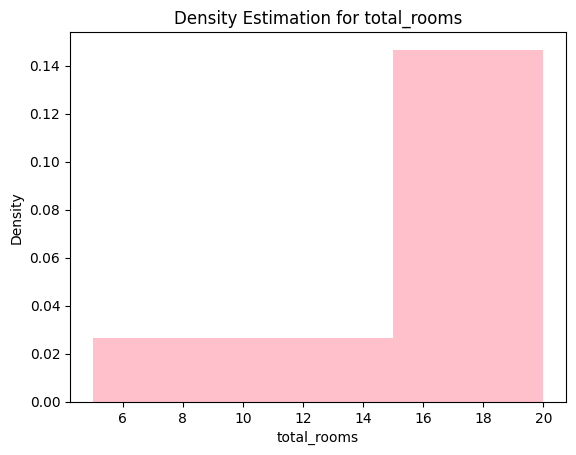

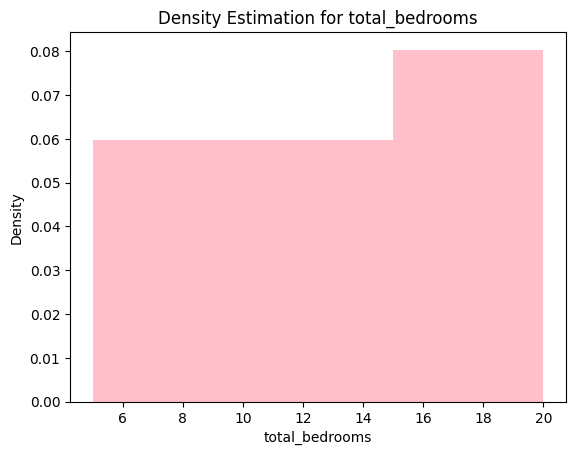

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("/content/archive.zip",usecols=['latitude','total_rooms','housing_median_age','total_bedrooms'])
bins = [5,10,15,20]
def plot_density(column_data,column_name):
    plt.hist(column_data,bins=bins,density=True,alpha=1,color='pink')
    plt.title(f'Density Estimation for {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Density')
    plt.show()

for column in data.columns:
    plot_density(data[column],column)
